<a href="https://colab.research.google.com/github/raj-vijay/dl/blob/master/18_Regularization_in_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dropout in Neural Network**

Dropout is a regularization technique patented by Google for reducing overfitting in neural networks by preventing complex co-adaptations on training data. 

It is a very efficient way of performing model averaging with neural networks. The term "dropout" refers to dropping out units (both hidden and visible) in a neural network.

Dropout

In each learning step:
- Select a subset of the units
- Ignore it in the forward pass
- And in the back-propagation of error


**Adding dropout to a network**

Dropout is a form of regularization that removes a different random subset of the units in a layer in each round of training. 

Here, we add dropout to the convolutional neural network:

- Convolution (100 units, kernel size 2, 'relu' activation)
- Dropout (20%)
- Convolution (50 units, kernel size 2, 'relu' activation)
- Flatten
- Dense (10 units, 'softmax' activation)

In [ ]:
# Import fundamental libraries used for the tensorflow
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
# Load the Fashion MNIST Data from TensorFlow Keras
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# Shape of data
print("Train Images: ", train_images.shape)
print("Test Images: ", test_images.shape)

Train Images:  (60000, 28, 28)
Test Images:  (10000, 28, 28)


In [ ]:
# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
train_images = train_images.reshape(train_images.shape[0], w, h, 1)
test_images = test_images.reshape(test_images.shape[0], w, h, 1)

# One-hot encode the labels
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Shape of data
print("Reshaped Train Images: ", train_images.shape)
print("Reshaped Test Images: ", test_images.shape)

Reshaped Train Images:  (60000, 28, 28, 1)
Reshaped Test Images:  (10000, 28, 28, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization

model = Sequential()

# Add a convolutional layer
model.add(Conv2D(100, kernel_size=2, activation='relu', 
                 input_shape=(28, 28, 1)))

# Add a dropout layer
model.add(Dropout(0.2))

# Add another convolutional layer
model.add(Conv2D(50, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 27, 27, 100)       500       
_________________________________________________________________
dropout_2 (Dropout)          (None, 27, 27, 100)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 50)        20050     
_________________________________________________________________
flatten_2 (Flatten)          (None, 33800)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                338010    
Total params: 358,560
Trainable params: 358,560
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model 
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

**Plot the learning curves**

During learning, the model will store the loss function evaluated in each epoch. Looking at the learning curves can tell us quite a bit about the learning process.

Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 228s 5ms/step - loss: 0.2585 - accuracy: 0.9037 - val_loss: 0.3739 - val_accuracy: 0.8763
Epoch 2/3
48000/48000 [==============================] - 227s 5ms/step - loss: 0.2399 - accuracy: 0.9113 - val_loss: 0.3731 - val_accuracy: 0.8746
Epoch 3/3
48000/48000 [==============================] - 228s 5ms/step - loss: 0.2227 - accuracy: 0.9187 - val_loss: 0.3849 - val_accuracy: 0.8737


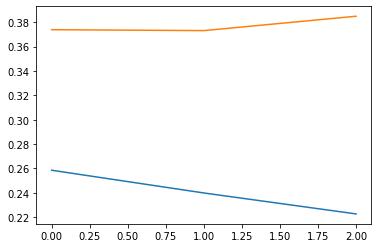

In [ ]:
import matplotlib.pyplot as plt

# Train the model and store the training object
training = model.fit(train_images, train_labels,
epochs=3, batch_size = 10, validation_split=0.2)

# Extract the history from the training object
history = training.history

# Plot the training loss 
plt.plot(history['loss'])
# Plot the validation loss
plt.plot(history['val_loss'])

# Show the figure
plt.show()

**Evaluating a CNN with test data**

To evaluate a trained neural network, provide a separate testing data set of labeled images.

In [ ]:
# Evaluate the model on separate test data
model.evaluate(test_images, test_labels, batch_size=10)

10000/10000 [==============================] - 10s 986us/step


[0.3988304269183864, 0.8679999709129333]

**Add batch normalization to your network**

Batch normalization is another form of regularization that rescales the outputs of a layer to make sure that they have mean 0 and standard deviation 1. 

Now, we add batch normalization to the convolutional neural network from above.

- Convolution (100 units, kernel size 2, 'relu' activation)
- Batch normalization
- Convolution (50 unites, kernel size 2, 'relu' activation)
- Flatten
- Dense (10 units, 'softmax' activation)

In [ ]:
model1 = Sequential()

# Add a convolutional layer
model1.add(Conv2D(100, kernel_size=2, activation='relu',
input_shape=(28, 28, 1)))


# Add batch normalization layer
model1.add(BatchNormalization())

# Add another convolutional layer
model1.add(Conv2D(50, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model1.add(Flatten())
model1.add(Dense(10, activation='softmax'))

model1.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 27, 27, 100)       500       
_________________________________________________________________
batch_normalization_4 (Batch (None, 27, 27, 100)       400       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 26, 26, 50)        20050     
_________________________________________________________________
flatten_6 (Flatten)          (None, 33800)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                338010    
Total params: 358,960
Trainable params: 358,760
Non-trainable params: 200
_________________________________________________________________


In [ ]:
# Compile the model 
model1.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 240s 5ms/step - loss: 0.4608 - accuracy: 0.8511 - val_loss: 0.3565 - val_accuracy: 0.8722
Epoch 2/3
48000/48000 [==============================] - 242s 5ms/step - loss: 0.2954 - accuracy: 0.8964 - val_loss: 0.3223 - val_accuracy: 0.8895
Epoch 3/3
48000/48000 [==============================] - 243s 5ms/step - loss: 0.2293 - accuracy: 0.9200 - val_loss: 0.3421 - val_accuracy: 0.8890


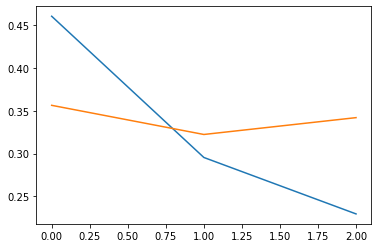

In [ ]:
import matplotlib.pyplot as plt

# Train the model and store the training object
training = model1.fit(train_images, train_labels,
epochs=3, batch_size = 10, validation_split=0.2)

# Extract the history from the training object
history = training.history

# Plot the training loss 
plt.plot(history['loss'])
# Plot the validation loss
plt.plot(history['val_loss'])

# Show the figure
plt.show()